In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, estimate_bandwidth
from sklearn.preprocessing import RobustScaler, PowerTransformer
from scipy.cluster.hierarchy import linkage # compute the clustering
from scipy.cluster.hierarchy import dendrogram # visualize the clustering

import warnings
warnings.filterwarnings("ignore")

# City Search Tool

- Purpose: Find a place that suits you according to your priorities/personality. 

#### Database

1) MoveHub City Ratings

  - MoveHub Quality of life (e.g. Movehub Rating	Purchase Power	Health Care	Pollution	Quality of Life	Crime Rating)
  - MoveHub Cost of living (e.g. Gasoline	Avg Rent	Avg Disposable Income)
  - Cities and Countries
     
2) World City Population

3) Cost of living index (e.g. Cost of Living Index	Rent Index	Cost of Living Plus Rent Index	Groceries Index	Restaurant Price Index	Local Purchasing Power Index)

4) Weather (e.g. Temperature)

## Workflow

![Capture](Capture.PNG)

### 1. Data load and Preprocessing

#### MoveHub City Ratings

In [2]:
city_rat_qual = pd.read_csv('movehubqualityoflife.csv')
city_rat_qual.head()

City  Movehub Rating  Purchase Power  Health Care  Pollution  \
0       Caracas           65.18           11.25        44.44      83.45   
1  Johannesburg           84.08           53.99        59.98      47.39   
2     Fortaleza           80.17           52.28        45.46      66.32   
3   Saint Louis           85.25           80.40        77.29      31.33   
4   Mexico City           75.07           24.28        61.76      18.95   

   Quality of Life  Crime Rating        lat        lng  
0             8.61         85.70  10.480594 -66.903606  
1            51.26         83.93 -26.204103  28.047305  
2            36.68         78.65  -3.732714 -38.526998  
3            87.51         78.13  38.627003 -90.199404  
4            27.91         77.86  19.432608 -99.133208

In [3]:
city_rat_qual.replace([np.inf, -np.inf, np.inf, -999, 999, '', " ", 'inf', 'NaN'], np.nan, inplace=True)
#city_rat_qual.isna().any() #check if NaN are present

In [4]:
#city_rat_qual.info()
#city_rat_qual[city_rat_qual.duplicated(subset=['City'])] #Duplicates

In [5]:
city_rat_cost = pd.read_csv('movehubcostofliving.csv')
city_rat_cost.head()

City  Cappuccino  Cinema   Wine  Gasoline  Avg Rent  \
0  Lausanne        3.15   12.59   8.40      1.32   1714.00   
1    Zurich        3.28   12.59   8.40      1.31   2378.61   
2    Geneva        2.80   12.94  10.49      1.28   2607.95   
3     Basel        3.50   11.89   7.35      1.25   1649.29   
4     Perth        2.87   11.43  10.08      0.97   2083.14   

   Avg Disposable Income  
0                4266.11  
1                4197.55  
2                3917.72  
3                3847.76  
4                3358.55

In [6]:
city_rat_cost.replace([np.inf, -np.inf, np.inf, -999, 999, '', " ", 'inf', 'NaN'], np.nan, inplace=True)
#city_rat_cost.isna().any() #check if NaN are present

In [7]:
#city_rat_cost.info()
#city_rat_cost[city_rat_cost.duplicated(subset=['City'])] #Duplicates

In [8]:
cities = pd.read_csv('cities.csv')
cities.head()

City        Country
0           Oakland  United States
1          Oakville         Canada
2  Oaxaca de Juárez         Mexico
3        Oberhausen        Germany
4           Obihiro          Japan

In [9]:
#cities.info()

In [10]:
data_mov=pd.merge(city_rat_qual, city_rat_cost, left_on='City', right_on='City')
#data_mov.head()

In [11]:
data_mov=pd.merge(data_mov, cities, left_on='City', right_on='City')
data_mov.head()

City  Movehub Rating  Purchase Power  Health Care  Pollution  \
0       Caracas           65.18           11.25        44.44      83.45   
1  Johannesburg           84.08           53.99        59.98      47.39   
2     Fortaleza           80.17           52.28        45.46      66.32   
3   Saint Louis           85.25           80.40        77.29      31.33   
4   Mexico City           75.07           24.28        61.76      18.95   

   Quality of Life  Crime Rating        lat        lng  Cappuccino  Cinema  \
0             8.61         85.70  10.480594 -66.903606        1.80    9.12   
1            51.26         83.93 -26.204103  28.047305        1.16    3.46   
2            36.68         78.65  -3.732714 -38.526998        1.46    5.20   
3            87.51         78.13  38.627003 -90.199404        1.96    6.54   
4            27.91         77.86  19.432608 -99.133208        1.60    3.20   

    Wine  Gasoline  Avg Rent  Avg Disposable Income       Country  
0  11.97      0.07   1634.42                 527.89     Venezuela  
1   3.53      0.84    705.63                1167.89  South Africa  
2   5.85      0.88    650.26                1307.54        Brazil  
3   6.54      0.61    980.65                2144.36       Senegal  
4   7.47      0.56    747.10                 587.01        Mexico

In [12]:
#data_mov.info()

#### World City Population

In [13]:
pop = pd.read_csv('worldcities.csv')
pop.head()

city   city_ascii      lat      lng country iso2 iso3   admin_name  \
0    Malishevë    Malisheve  42.4822  20.7458  Kosovo   XK  XKS    Malishevë   
1      Prizren      Prizren  42.2139  20.7397  Kosovo   XK  XKS      Prizren   
2  Zubin Potok  Zubin Potok  42.9144  20.6897  Kosovo   XK  XKS  Zubin Potok   
3     Kamenicë     Kamenice  42.5781  21.5803  Kosovo   XK  XKS     Kamenicë   
4         Viti         Viti  42.3214  21.3583  Kosovo   XK  XKS         Viti   

  capital  population          id  
0   admin         NaN  1901597212  
1   admin         NaN  1901360309  
2   admin         NaN  1901608808  
3   admin         NaN  1901851592  
4   admin         NaN  1901328795

In [14]:
pop_filt=pop[['city','population','country','admin_name','lat','lng']]

In [15]:
pop_filt.replace([np.inf, -np.inf, np.inf, -999, 999, '', " ", 'inf', 'NaN'], np.nan, inplace=True)
pop_filt.isna().any() #check if NaN are present

city          False
population     True
country       False
admin_name     True
lat           False
lng           False
dtype: bool

In [16]:
pop_filt = pop_filt.dropna() 
pop_filt.head()

city  population country         admin_name      lat      lng
39        Sanaa   2008000.0   Yemen  Amānat al ‘Āşimah  15.3547  44.2066
40        Marib     16794.0   Yemen             Ma’rib  15.4210  45.3340
42       Hajjah    208287.0   Yemen             Ḩajjah  15.6917  43.6021
43          Ibb    234837.0   Yemen                Ibb  13.9759  44.1709
44  Al Hudaydah    780000.0   Yemen        Al Ḩudaydah  14.7979  42.9530

In [17]:
#pop_filt.info()
#pop_filt[pop_filt.duplicated(subset=['city'])] #Duplicates

#### Cost of living

In [18]:
cost = pd.read_csv('Cost_of_living_index.csv')
cost.head()

Rank                   City  Cost of Living Index  Rent Index  \
0     1      Hamilton, Bermuda                137.56      103.03   
1     2    Zurich, Switzerland                128.65       62.62   
2     3     Basel, Switzerland                126.89       46.14   
3     4  Lausanne, Switzerland                119.62       50.35   
4     5      Bern, Switzerland                118.42       39.22   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          121.21           126.56                  151.77   
1                           97.39           127.35                  127.14   
2                           88.66           120.44                  129.10   
3                           86.83           116.35                  122.83   
4                           80.93           114.54                  114.86   

   Local Purchasing Power Index  
0                        114.19  
1                        142.39  
2                        141.48  
3                        132.58  
4                        115.48

In [19]:
cost=pd.concat([cost, cost['City'].str.split(', ', expand=True)], axis=1)

In [20]:
cost=cost.drop(columns=['City',2])

In [21]:
cost=cost.rename(columns={0: "City", 1: "Country"})
cost.head()

Rank  Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
0     1                137.56      103.03                          121.21   
1     2                128.65       62.62                           97.39   
2     3                126.89       46.14                           88.66   
3     4                119.62       50.35                           86.83   
4     5                118.42       39.22                           80.93   

   Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
0           126.56                  151.77                        114.19   
1           127.35                  127.14                        142.39   
2           120.44                  129.10                        141.48   
3           116.35                  122.83                        132.58   
4           114.54                  114.86                        115.48   

       City      Country  
0  Hamilton      Bermuda  
1    Zurich  Switzerland  
2     Basel  Switzerland  
3  Lausanne  Switzerland  
4      Bern  Switzerland

In [22]:
#cost[cost.duplicated(subset=['City'])] 

#### Weather

In [23]:
temp = pd.read_csv('city_temperature.csv')
temp.head()

Region  Country State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9

In [24]:
temp=temp[temp["Year"]>2018]
temp=temp.groupby(["City"]).mean()

In [25]:
temp.reset_index(inplace=True)

In [26]:
temp=temp[["City","AvgTemperature"]]
temp.head()

City  AvgTemperature
0       Abidjan       80.269940
1       Abilene       63.143687
2     Abu Dhabi       78.582565
3   Addis Ababa       57.809237
4  Akron Canton       49.341082

#### Concatenate

In [27]:
data_pop_mov=pd.merge(data_mov, pop_filt, how='left',left_on='City', right_on='city')

data_pop_mov.head()

City  Movehub Rating  Purchase Power  Health Care  Pollution  \
0       Caracas           65.18           11.25        44.44      83.45   
1  Johannesburg           84.08           53.99        59.98      47.39   
2     Fortaleza           80.17           52.28        45.46      66.32   
3   Saint Louis           85.25           80.40        77.29      31.33   
4   Saint Louis           85.25           80.40        77.29      31.33   

   Quality of Life  Crime Rating      lat_x      lng_x  Cappuccino  ...  \
0             8.61         85.70  10.480594 -66.903606        1.80  ...   
1            51.26         83.93 -26.204103  28.047305        1.16  ...   
2            36.68         78.65  -3.732714 -38.526998        1.46  ...   
3            87.51         78.13  38.627003 -90.199404        1.96  ...   
4            87.51         78.13  38.627003 -90.199404        1.96  ...   

   Gasoline  Avg Rent  Avg Disposable Income       Country          city  \
0      0.07   1634.42                 527.89     Venezuela       Caracas   
1      0.84    705.63                1167.89  South Africa  Johannesburg   
2      0.88    650.26                1307.54        Brazil     Fortaleza   
3      0.61    980.65                2144.36       Senegal   Saint Louis   
4      0.61    980.65                2144.36       Senegal   Saint Louis   

  population        country        admin_name    lat_y    lng_y  
0  2985000.0      Venezuela  Distrito Capital  10.5010 -66.9170  
1  3435000.0   South Africa           Gauteng -26.1700  28.0300  
2  3602319.0         Brazil             Ceará  -3.7500 -38.5800  
3  2078283.0  United States          Missouri  38.6358 -90.2451  
4     7298.0  United States          Michigan  43.4082 -84.6118  

[5 rows x 22 columns]

In [28]:
data_pop_mov=data_pop_mov[data_pop_mov.Country==data_pop_mov.country]

In [29]:
data_pop_mov_filt=data_pop_mov.drop(index=[12,32,33,44,45,46,47,48,56,109,114,142,156,159,182,188,198,228,230,232,233,234,236,261,264,271,
                             287,289,290,298])

In [30]:
data_pop_mov_filt.head()

City  Movehub Rating  Purchase Power  Health Care  Pollution  \
0       Caracas           65.18           11.25        44.44      83.45   
1  Johannesburg           84.08           53.99        59.98      47.39   
2     Fortaleza           80.17           52.28        45.46      66.32   
5   Mexico City           75.07           24.28        61.76      18.95   
6       Detroit           70.63           73.81        63.05      83.45   

   Quality of Life  Crime Rating      lat_x      lng_x  Cappuccino  ...  \
0             8.61         85.70  10.480594 -66.903606        1.80  ...   
1            51.26         83.93 -26.204103  28.047305        1.16  ...   
2            36.68         78.65  -3.732714 -38.526998        1.46  ...   
5            27.91         77.86  19.432608 -99.133208        1.60  ...   
6            50.99         76.69  42.331427 -83.045754        1.96  ...   

   Gasoline  Avg Rent  Avg Disposable Income        Country          city  \
0      0.07   1634.42                 527.89      Venezuela       Caracas   
1      0.84    705.63                1167.89   South Africa  Johannesburg   
2      0.88    650.26                1307.54         Brazil     Fortaleza   
5      0.56    747.10                 587.01         Mexico   Mexico City   
6      0.67    632.19                1895.93  United States       Detroit   

   population        country        admin_name    lat_y    lng_y  
0   2985000.0      Venezuela  Distrito Capital  10.5010 -66.9170  
1   3435000.0   South Africa           Gauteng -26.1700  28.0300  
2   3602319.0         Brazil             Ceará  -3.7500 -38.5800  
5  19028000.0         Mexico  Ciudad de México  19.4424 -99.1310  
6   3522206.0  United States          Michigan  42.3834 -83.1024  

[5 rows x 22 columns]

In [31]:
#data_pop_mov_filt[data_pop_mov_filt.duplicated(subset=['City'])] #No Duplicates

In [32]:
data_pop_mov_filt=data_pop_mov_filt.drop(columns=['city','country','admin_name','lat_y','lng_y'])
data_pop_mov_filt.head()

City  Movehub Rating  Purchase Power  Health Care  Pollution  \
0       Caracas           65.18           11.25        44.44      83.45   
1  Johannesburg           84.08           53.99        59.98      47.39   
2     Fortaleza           80.17           52.28        45.46      66.32   
5   Mexico City           75.07           24.28        61.76      18.95   
6       Detroit           70.63           73.81        63.05      83.45   

   Quality of Life  Crime Rating      lat_x      lng_x  Cappuccino  Cinema  \
0             8.61         85.70  10.480594 -66.903606        1.80    9.12   
1            51.26         83.93 -26.204103  28.047305        1.16    3.46   
2            36.68         78.65  -3.732714 -38.526998        1.46    5.20   
5            27.91         77.86  19.432608 -99.133208        1.60    3.20   
6            50.99         76.69  42.331427 -83.045754        1.96    5.56   

    Wine  Gasoline  Avg Rent  Avg Disposable Income        Country  population  
0  11.97      0.07   1634.42                 527.89      Venezuela   2985000.0  
1   3.53      0.84    705.63                1167.89   South Africa   3435000.0  
2   5.85      0.88    650.26                1307.54         Brazil   3602319.0  
5   7.47      0.56    747.10                 587.01         Mexico  19028000.0  
6   7.85      0.67    632.19                1895.93  United States   3522206.0

In [33]:
#data_pop_mov_filt[data_pop_mov.isna().any(axis=1)] #No Nan Values

In [34]:
data_pop_mov_filt.shape

(165, 17)

In [35]:
data_m1=pd.merge(data_pop_mov_filt, cost, how='left', left_on='City', right_on='City')
data_m1.head()

City  Movehub Rating  Purchase Power  Health Care  Pollution  \
0       Caracas           65.18           11.25        44.44      83.45   
1  Johannesburg           84.08           53.99        59.98      47.39   
2     Fortaleza           80.17           52.28        45.46      66.32   
3   Mexico City           75.07           24.28        61.76      18.95   
4       Detroit           70.63           73.81        63.05      83.45   

   Quality of Life  Crime Rating      lat_x      lng_x  Cappuccino  ...  \
0             8.61         85.70  10.480594 -66.903606        1.80  ...   
1            51.26         83.93 -26.204103  28.047305        1.16  ...   
2            36.68         78.65  -3.732714 -38.526998        1.46  ...   
3            27.91         77.86  19.432608 -99.133208        1.60  ...   
4            50.99         76.69  42.331427 -83.045754        1.96  ...   

       Country_x  population   Rank  Cost of Living Index  Rent Index  \
0      Venezuela   2985000.0  500.0                 27.82        8.43   
1   South Africa   3435000.0  356.0                 45.51       17.34   
2         Brazil   3602319.0    NaN                   NaN         NaN   
3         Mexico  19028000.0  454.0                 34.18       17.94   
4  United States   3522206.0  256.0                 62.77       34.22   

  Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          18.64            28.40                   23.63   
1                          32.18            35.68                   42.93   
2                            NaN              NaN                     NaN   
3                          26.49            29.88                   30.51   
4                          49.25            56.21                   51.65   

   Local Purchasing Power Index     Country_y  
0                          4.18     Venezuela  
1                        108.84  South Africa  
2                           NaN           NaN  
3                         51.40        Mexico  
4                         97.41            MI  

[5 rows x 25 columns]

In [36]:
data_m1=data_m1.drop(index=[47,61,127])

In [37]:
#data_m1[data_m1.duplicated(subset=['City'])] #No Duplicates

In [38]:
data_m2=pd.merge(data_m1, temp, how='left', left_on='City', right_on='City')
data_m2.head()

City  Movehub Rating  Purchase Power  Health Care  Pollution  \
0       Caracas           65.18           11.25        44.44      83.45   
1  Johannesburg           84.08           53.99        59.98      47.39   
2     Fortaleza           80.17           52.28        45.46      66.32   
3   Mexico City           75.07           24.28        61.76      18.95   
4       Detroit           70.63           73.81        63.05      83.45   

   Quality of Life  Crime Rating      lat_x      lng_x  Cappuccino  ...  \
0             8.61         85.70  10.480594 -66.903606        1.80  ...   
1            51.26         83.93 -26.204103  28.047305        1.16  ...   
2            36.68         78.65  -3.732714 -38.526998        1.46  ...   
3            27.91         77.86  19.432608 -99.133208        1.60  ...   
4            50.99         76.69  42.331427 -83.045754        1.96  ...   

   population   Rank  Cost of Living Index  Rent Index  \
0   2985000.0  500.0                 27.82        8.43   
1   3435000.0  356.0                 45.51       17.34   
2   3602319.0    NaN                   NaN         NaN   
3  19028000.0  454.0                 34.18       17.94   
4   3522206.0  256.0                 62.77       34.22   

   Cost of Living Plus Rent Index Groceries Index  Restaurant Price Index  \
0                           18.64           28.40                   23.63   
1                           32.18           35.68                   42.93   
2                             NaN             NaN                     NaN   
3                           26.49           29.88                   30.51   
4                           49.25           56.21                   51.65   

   Local Purchasing Power Index     Country_y  AvgTemperature  
0                          4.18     Venezuela       73.472289  
1                        108.84  South Africa             NaN  
2                           NaN           NaN             NaN  
3                         51.40        Mexico       62.817269  
4                         97.41            MI       47.075752  

[5 rows x 26 columns]

In [39]:
data_m2.columns

Index(['City', 'Movehub Rating', 'Purchase Power', 'Health Care', 'Pollution',
       'Quality of Life', 'Crime Rating', 'lat_x', 'lng_x', 'Cappuccino',
       'Cinema', 'Wine', 'Gasoline', 'Avg Rent', 'Avg Disposable Income',
       'Country_x', 'population', 'Rank', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index', 'Country_y',
       'AvgTemperature'],
      dtype='object')

In [40]:
#data_m2[data_m2.duplicated(subset=['City'])] #No Duplicates

In [41]:
data=data_m2.drop(columns=['Cappuccino','Cinema','Wine','Rent Index','Restaurant Price Index',
                          'Local Purchasing Power Index', 'Country_y'])
data.head()

City  Movehub Rating  Purchase Power  Health Care  Pollution  \
0       Caracas           65.18           11.25        44.44      83.45   
1  Johannesburg           84.08           53.99        59.98      47.39   
2     Fortaleza           80.17           52.28        45.46      66.32   
3   Mexico City           75.07           24.28        61.76      18.95   
4       Detroit           70.63           73.81        63.05      83.45   

   Quality of Life  Crime Rating      lat_x      lng_x  Gasoline  Avg Rent  \
0             8.61         85.70  10.480594 -66.903606      0.07   1634.42   
1            51.26         83.93 -26.204103  28.047305      0.84    705.63   
2            36.68         78.65  -3.732714 -38.526998      0.88    650.26   
3            27.91         77.86  19.432608 -99.133208      0.56    747.10   
4            50.99         76.69  42.331427 -83.045754      0.67    632.19   

   Avg Disposable Income      Country_x  population   Rank  \
0                 527.89      Venezuela   2985000.0  500.0   
1                1167.89   South Africa   3435000.0  356.0   
2                1307.54         Brazil   3602319.0    NaN   
3                 587.01         Mexico  19028000.0  454.0   
4                1895.93  United States   3522206.0  256.0   

   Cost of Living Index  Cost of Living Plus Rent Index  Groceries Index  \
0                 27.82                           18.64            28.40   
1                 45.51                           32.18            35.68   
2                   NaN                             NaN              NaN   
3                 34.18                           26.49            29.88   
4                 62.77                           49.25            56.21   

   AvgTemperature  
0       73.472289  
1             NaN  
2             NaN  
3       62.817269  
4       47.075752

In [42]:
data.count()

City                              165
Movehub Rating                    165
Purchase Power                    165
Health Care                       165
Pollution                         165
Quality of Life                   165
Crime Rating                      165
lat_x                             165
lng_x                             165
Gasoline                          165
Avg Rent                          165
Avg Disposable Income             165
Country_x                         165
population                        165
Rank                              160
Cost of Living Index              160
Cost of Living Plus Rent Index    160
Groceries Index                   160
AvgTemperature                     76
dtype: int64

In [43]:
#data.isna().sum()
#data[data.duplicated(subset=['City'])] 

In [44]:
data.groupby(["City"]).sum()

Movehub Rating  Purchase Power  Health Care  Pollution  \
City                                                                  
Aberdeen              81.89           49.70        82.86      34.31   
Abu Dhabi             86.40           68.03        48.02      53.42   
Addis Ababa           59.88            6.38        63.89      85.59   
Adelaide              87.29           72.03        56.25      12.01   
Ahmedabad             76.16           33.69        61.67      68.21   
...                     ...             ...          ...        ...   
Victoria              81.44           52.91        79.63      68.93   
Vienna                81.84           51.21        79.86      22.39   
Vilnius               72.45           24.17        77.31      82.08   
Warsaw                76.76           35.77        63.33      86.16   
Zagreb                73.84           26.71        52.78      83.45   

             Quality of Life  Crime Rating      lat_x       lng_x  Gasoline  \
City                                                                          
Aberdeen               76.77         24.22  57.149717   -2.094278      1.37   
Abu Dhabi              80.80         10.86  24.453884   54.377344      0.30   
Addis Ababa            28.41         26.04   8.980603   38.757760      0.72   
Adelaide               91.54         41.32 -34.928499  138.600746      0.95   
Ahmedabad              57.01         18.18  23.022505   72.571362      0.85   
...                      ...           ...        ...         ...       ...   
Victoria               80.87         42.45 -37.471308  144.785153      0.83   
Vienna                 77.21         27.45  48.208174   16.373819      1.25   
Vilnius                64.19         27.93  54.687156   25.279651      1.19   
Warsaw                 51.82         32.03  52.229676   21.012229      1.18   
Zagreb                 47.59         32.29  45.815011   15.981919      1.23   

             Avg Rent  Avg Disposable Income  population   Rank  \
City                                                              
Aberdeen      1195.74                1743.78    189364.0  107.0   
Abu Dhabi     1779.93                2135.92    603492.0  269.0   
Addis Ababa    653.77                 124.22   3100000.0  330.0   
Adelaide      1382.26                2911.69   1145000.0  110.0   
Ahmedabad      193.08                 301.69   5375000.0  519.0   
...               ...                    ...         ...    ...   
Victoria      1083.77                1657.53    289625.0  209.0   
Vienna        1248.90                1619.72   2400000.0  135.0   
Vilnius        493.78                 457.29    542366.0  340.0   
Warsaw         726.59                 664.31   1707000.0  376.0   
Zagreb         504.36                 605.23    722526.0  317.0   

             Cost of Living Index  Cost of Living Plus Rent Index  \
City                                                                
Aberdeen                    73.02                           51.69   
Abu Dhabi                   61.94                           60.28   
Addis Ababa                 49.96                           39.93   
Adelaide                    72.92                           53.54   
Ahmedabad                   24.24                           15.22   
...                           ...                             ...   
Victoria                    66.17                           52.88   
Vienna                      70.86                           52.70   
Vilnius                     48.31                           33.51   
Warsaw                      42.32                           32.04   
Zagreb                      52.20                           34.44   

             Groceries Index  AvgTemperature  
City                                          
Aberdeen               57.21        0.000000  
Abu Dhabi              50.11       78.582565  
Addis Ababa            39.26       57.809237  
Adelaide               67.23        0.000000  
Ahmedabad

In [45]:
data.dtypes

City                               object
Movehub Rating                    float64
Purchase Power                    float64
Health Care                       float64
Pollution                         float64
Quality of Life                   float64
Crime Rating                      float64
lat_x                             float64
lng_x                             float64
Gasoline                          float64
Avg Rent                          float64
Avg Disposable Income             float64
Country_x                          object
population                        float64
Rank                              float64
Cost of Living Index              float64
Cost of Living Plus Rent Index    float64
Groceries Index                   float64
AvgTemperature                    float64
dtype: object

## 2. Visualization

In [46]:
fig = px.scatter_mapbox(data, lat="lat_x", lon="lng_x", hover_name="City", 
                        hover_data=["population","Purchase Power","Health Care","Quality of Life","Pollution","Crime Rating",
                                   "Avg Rent","Cost of Living Index","Avg Disposable Income","AvgTemperature"],
                        zoom=3, height=300)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [47]:
#Features
data_feat=data.drop(columns=['lat_x','lng_x'])

### 2.1. Population

In [48]:
#Top population (Countries)
count=data_feat.groupby(["Country_x"]).sum()
top_pop=count.sort_values(by='population', ascending = False)

In [49]:
top_pop_10=top_pop[:10]

fig = px.bar(top_pop_10, 
  x=top_pop_10.index, y='population', color='Pollution', 
             title=("Top 10 Countries with the Highest Population (On this dataset)"),
             hover_data=["Purchase Power","Health Care","Quality of Life","Pollution","Crime Rating",
                                   "Avg Rent","Cost of Living Index","Avg Disposable Income"],
             orientation='v')

fig.show()

In [50]:
#Top population (Cities)
count=data_feat.groupby(["City"]).sum()
top_pop=count.sort_values(by='population', ascending = False)

In [51]:
top_pop_20=top_pop[:20]

fig = px.bar(top_pop_20, 
  x=top_pop_20.index, y='population', color='Pollution', 
             title=("Top 20 Cities with the Highest Population"),
             hover_data=["Purchase Power","Health Care","Quality of Life","Pollution","Crime Rating",
                                   "Avg Rent","Cost of Living Index","Avg Disposable Income"],
             orientation='v')

fig.show()

In [52]:
fig = px.pie(top_pop_20, values='population', names=top_pop_20.index, title=("Top 20 Cities with the Highest Population"))
fig.show()

In [53]:
top_pop_30=top_pop[:30]

fig = px.scatter(
  top_pop_30, x='Quality of Life', y='Health Care', 
  color=top_pop_30.index, size='population',
  hover_data=["Purchase Power","Health Care","Quality of Life","Pollution","Crime Rating",
                                   "Avg Rent","Cost of Living Index","Avg Disposable Income"],
  title=("Top 30 Cities with the Highest Population")
)
fig.show()

### 2.2. Crime rate

In [54]:
#Top  Crime rate (City)
count=data_feat.groupby(["City"]).sum()
top_pop=count.sort_values(by='Crime Rating', ascending = False)

In [55]:
top_pop_20=top_pop[:20]

fig = px.bar(top_pop_20, 
  x=top_pop_20.index, y='Crime Rating', color='Quality of Life', 
             title="Top 20 Crime rate (Cities)",
             hover_data=["Purchase Power","Health Care","Pollution","Avg Rent","Cost of Living Index","Avg Disposable Income"],
             orientation='v')

fig.show()

In [56]:
top_pop_20=top_pop[:20]

fig = px.scatter(
  top_pop_20, x='Quality of Life', y='Crime Rating', 
  color=top_pop_20.index, size='population',
  hover_data=["Purchase Power","Health Care","Pollution","Avg Rent","Cost of Living Index","Avg Disposable Income"],
  title=("Top 20 Cities with the Highest Crime Rate")
)

fig.show()

### 2.3. Quality of Life

In [57]:
#Top Quality of Life (City)
count=data_feat.groupby(["City"]).sum()
top_pop=count.sort_values(by='Quality of Life', ascending = False)

In [58]:
top_pop_20=top_pop[:20]

fig = px.bar(top_pop_20, 
  x=top_pop_20.index, y='Quality of Life', color='Avg Disposable Income', 
             title="Top 20 Highest Quality of Life (Cities)",orientation='v')

fig.show()

In [59]:
top_pop_20=top_pop[:20]

fig = px.scatter(
  top_pop_20, y='Quality of Life', x='Avg Disposable Income', 
  color=top_pop_20.index, size='population',
  hover_data=["Purchase Power","Health Care","Pollution","Avg Rent","Cost of Living Index","Crime Rating"],
  title=("Top 20 Cities with the Highest Quality of Life")
)

fig.show()

### 2.4. Pollution

In [60]:
#Top Polluted Cities
count=data_feat.groupby(["City"]).sum()
top_pop=count.sort_values(by='Pollution', ascending = False)

In [61]:
top_pop_20=top_pop[:20]

fig = px.bar(top_pop_20, 
  x=top_pop_20.index, y='Pollution', color='Purchase Power', 
             title="Top 20 Highest Polluted Cities",orientation='v')

fig.show()

In [62]:
top_pop_20=top_pop[:20]

fig = px.scatter(
  top_pop_20, y='Pollution', x='Purchase Power', 
  color=top_pop_20.index, size='population',
  hover_data=["Avg Disposable Income","Health Care","Quality of Life","Avg Rent","Cost of Living Index","Crime Rating"],
  title=("Top 20 Cities with the Highest Pollution")
)

fig.show()

## 3. Clustering

In [63]:
data_feat['City'] = data_feat['City'].astype('category')
data_feat['Country_x'] = data_feat['Country_x'].astype('category')
data_feat.head()

City  Movehub Rating  Purchase Power  Health Care  Pollution  \
0       Caracas           65.18           11.25        44.44      83.45   
1  Johannesburg           84.08           53.99        59.98      47.39   
2     Fortaleza           80.17           52.28        45.46      66.32   
3   Mexico City           75.07           24.28        61.76      18.95   
4       Detroit           70.63           73.81        63.05      83.45   

   Quality of Life  Crime Rating  Gasoline  Avg Rent  Avg Disposable Income  \
0             8.61         85.70      0.07   1634.42                 527.89   
1            51.26         83.93      0.84    705.63                1167.89   
2            36.68         78.65      0.88    650.26                1307.54   
3            27.91         77.86      0.56    747.10                 587.01   
4            50.99         76.69      0.67    632.19                1895.93   

       Country_x  population   Rank  Cost of Living Index  \
0      Venezuela   2985000.0  500.0                 27.82   
1   South Africa   3435000.0  356.0                 45.51   
2         Brazil   3602319.0    NaN                   NaN   
3         Mexico  19028000.0  454.0                 34.18   
4  United States   3522206.0  256.0                 62.77   

   Cost of Living Plus Rent Index  Groceries Index  AvgTemperature  
0                           18.64            28.40       73.472289  
1                           32.18            35.68             NaN  
2                             NaN              NaN             NaN  
3                           26.49            29.88       62.817269  
4                           49.25            56.21       47.075752

In [64]:
data_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 164
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   City                            165 non-null    category
 1   Movehub Rating                  165 non-null    float64 
 2   Purchase Power                  165 non-null    float64 
 3   Health Care                     165 non-null    float64 
 4   Pollution                       165 non-null    float64 
 5   Quality of Life                 165 non-null    float64 
 6   Crime Rating                    165 non-null    float64 
 7   Gasoline                        165 non-null    float64 
 8   Avg Rent                        165 non-null    float64 
 9   Avg Disposable Income           165 non-null    float64 
 10  Country_x                       165 non-null    category
 11  population                      165 non-null    float64 
 12  Rank                  

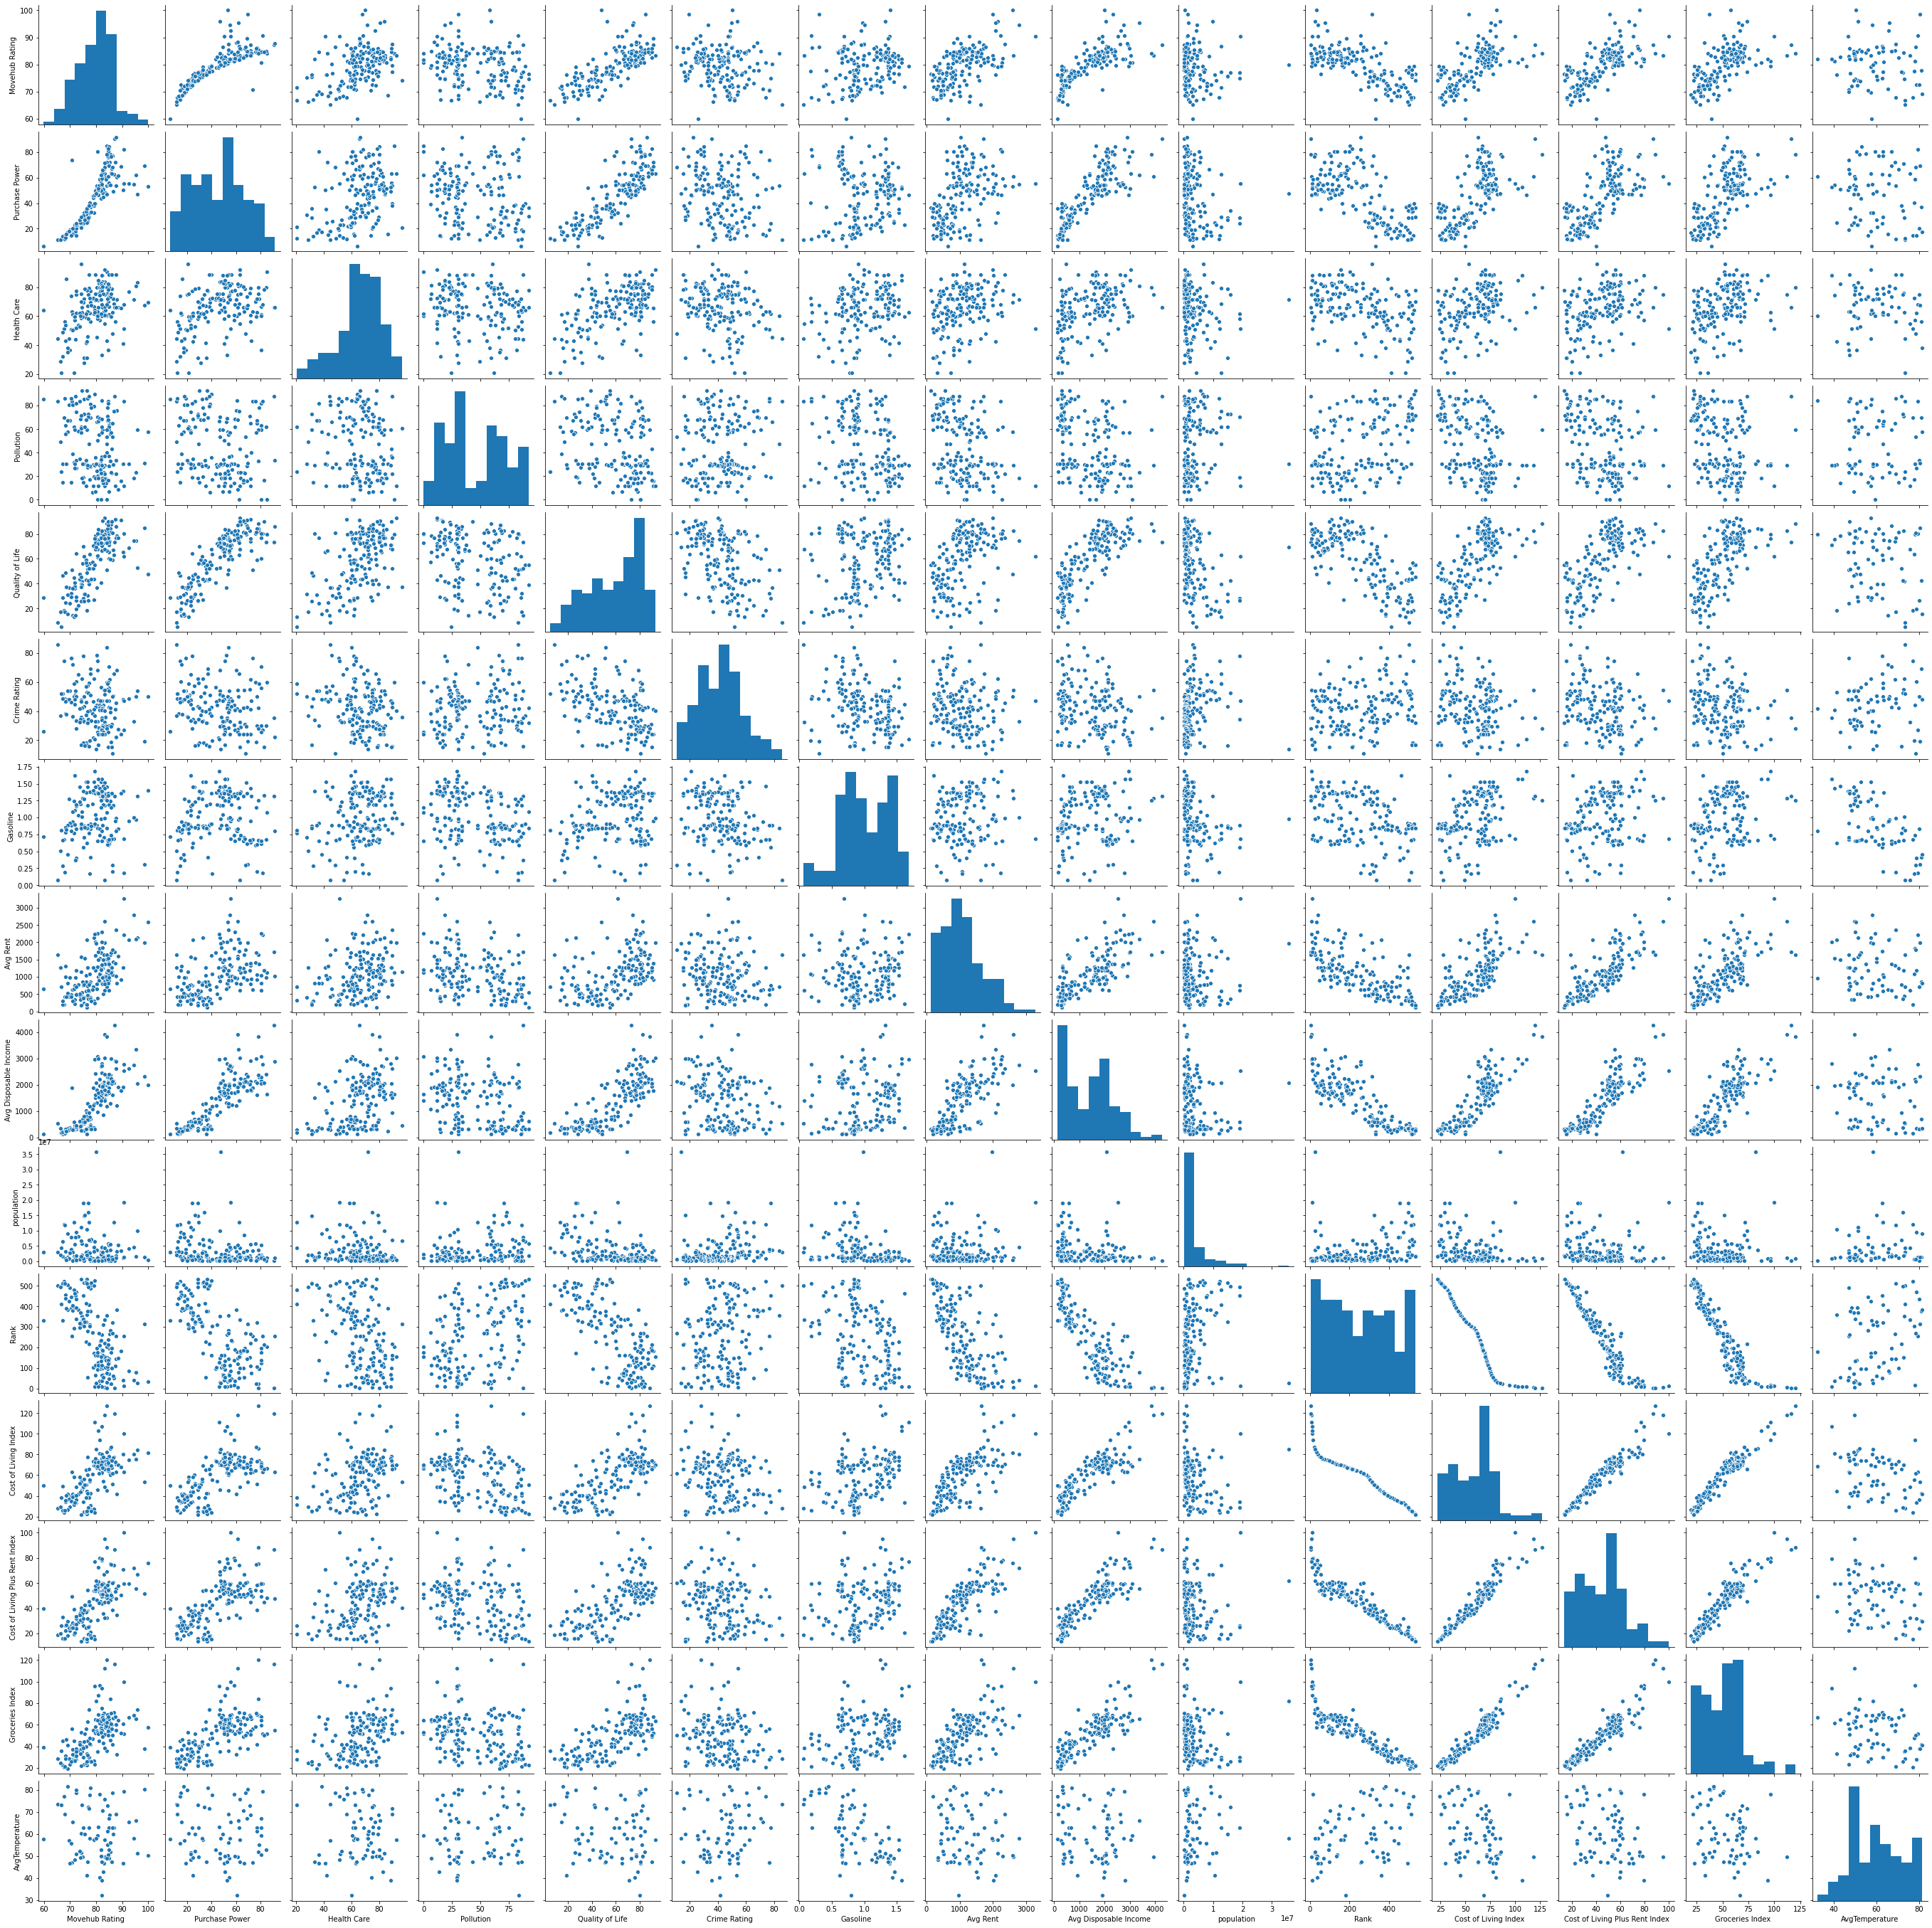

In [65]:
#Features
sns.pairplot(data_feat)
plt.show()

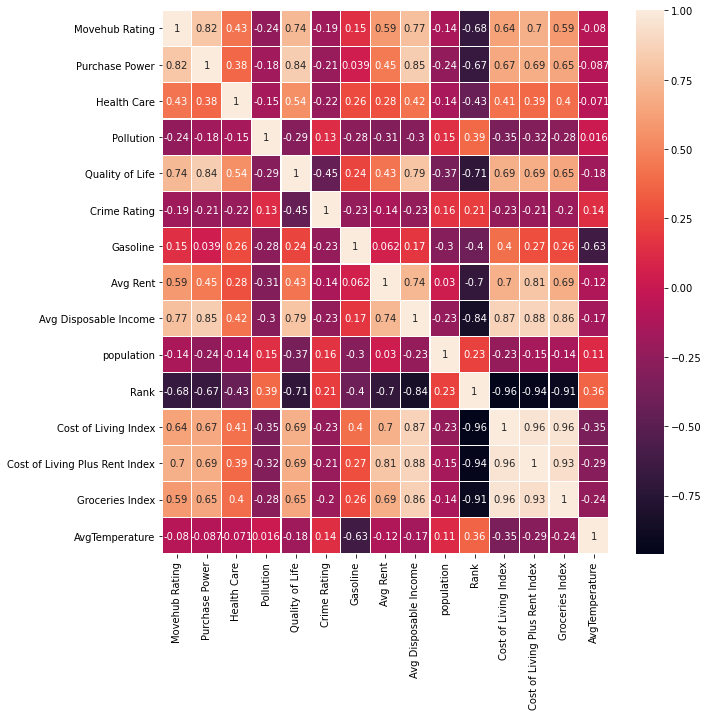

In [66]:
#Correlation matrix (Pearson)
fig, ax = plt.subplots(figsize=(10,10))
corrMatrix = data_feat.corr()
sns.heatmap(corrMatrix, annot=True,linewidths=.3, ax=ax)
plt.show()

#### Variance inflation factor (VIF): Multicollinarity analysis

In [67]:
dat=data_feat.iloc[:,:11]
dat=dat.drop(columns=['City','Country_x'])

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["Feature"] = dat.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(dat.values, i) 
                          for i in range(len(dat.columns))]

vif_data

Feature         VIF
0         Movehub Rating  102.721802
1         Purchase Power   46.850011
2            Health Care   29.961336
3              Pollution    4.987412
4        Quality of Life   54.284532
5           Crime Rating   11.574403
6               Gasoline   12.015481
7               Avg Rent   15.026078
8  Avg Disposable Income   32.065406

- VIF = 1, no correlation between the independent variable and the other variables
- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

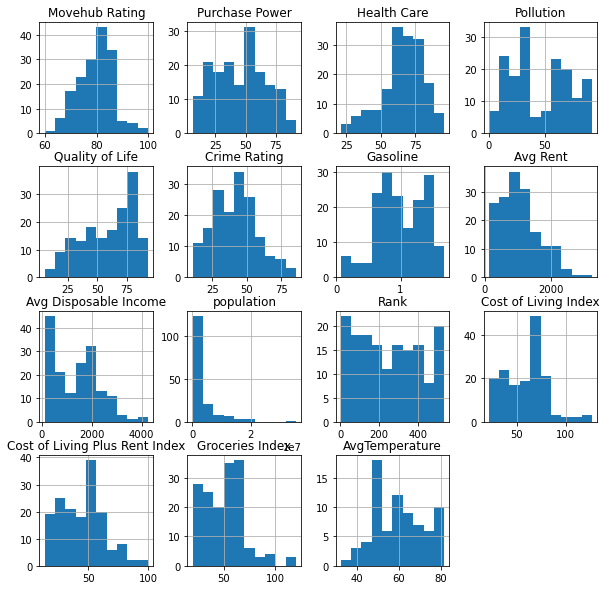

In [68]:
#Histogram
data_feat.hist(figsize=(10,10))
plt.show()

In [69]:
data_feat.columns

Index(['City', 'Movehub Rating', 'Purchase Power', 'Health Care', 'Pollution',
       'Quality of Life', 'Crime Rating', 'Gasoline', 'Avg Rent',
       'Avg Disposable Income', 'Country_x', 'population', 'Rank',
       'Cost of Living Index', 'Cost of Living Plus Rent Index',
       'Groceries Index', 'AvgTemperature'],
      dtype='object')

In [70]:
data_all_feat=data_feat.drop(columns=['AvgTemperature','City','Country_x'])
data_all_feat = data_all_feat.dropna() 
data_all_feat.head()

Movehub Rating  Purchase Power  Health Care  Pollution  Quality of Life  \
0           65.18           11.25        44.44      83.45             8.61   
1           84.08           53.99        59.98      47.39            51.26   
3           75.07           24.28        61.76      18.95            27.91   
4           70.63           73.81        63.05      83.45            50.99   
5           70.46           19.07        51.01      86.16            31.87   

   Crime Rating  Gasoline  Avg Rent  Avg Disposable Income  population   Rank  \
0         85.70      0.07   1634.42                 527.89   2985000.0  500.0   
1         83.93      0.84    705.63                1167.89   3435000.0  356.0   
3         77.86      0.56    747.10                 587.01  19028000.0  454.0   
4         76.69      0.67    632.19                1895.93   3522206.0  256.0   
5         76.46      0.89    487.69                 306.89   3917000.0  389.0   

   Cost of Living Index  Cost of Living Plus Rent Index  Groceries Index  
0                 27.82                           18.64            28.40  
1                 45.51                           32.18            35.68  
3                 34.18                           26.49            29.88  
4                 62.77                           49.25            56.21  
5                 40.56                           26.32            28.08

In [71]:
print(data_all_feat.shape)

(160, 14)


#### Data without correlated features

In [72]:
data_clust=data_feat[['Crime Rating', 'Pollution', 'Health Care', 'Avg Rent','population', 
                      'Groceries Index', 'Gasoline','Quality of Life']]

data_clust.head()

Crime Rating  Pollution  Health Care  Avg Rent  population  \
0         85.70      83.45        44.44   1634.42   2985000.0   
1         83.93      47.39        59.98    705.63   3435000.0   
2         78.65      66.32        45.46    650.26   3602319.0   
3         77.86      18.95        61.76    747.10  19028000.0   
4         76.69      83.45        63.05    632.19   3522206.0   

   Groceries Index  Gasoline  Quality of Life  
0            28.40      0.07             8.61  
1            35.68      0.84            51.26  
2              NaN      0.88            36.68  
3            29.88      0.56            27.91  
4            56.21      0.67            50.99

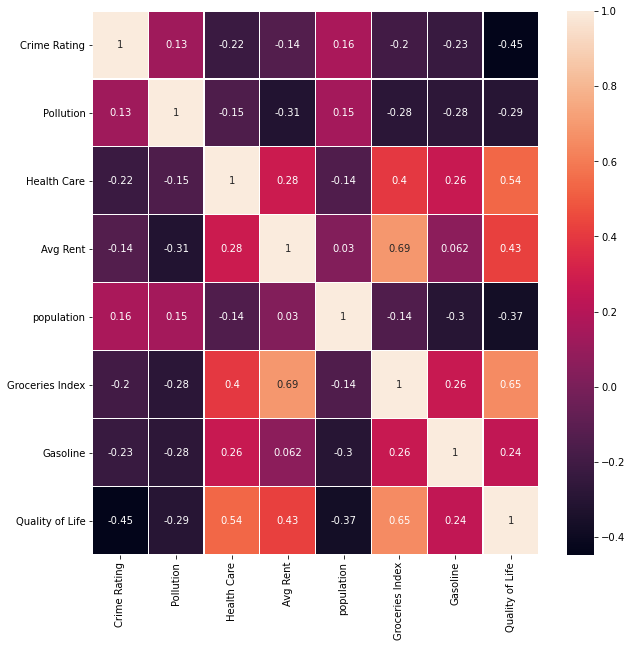

In [73]:
#Correlation matrix (Pearson)
fig, ax = plt.subplots(figsize=(10,10))
corrMatrix = data_clust.corr()
sns.heatmap(corrMatrix, annot=True,linewidths=.3, ax=ax)
plt.show()

In [74]:
data_clust = data_clust.dropna() 
data_clust.head()

Crime Rating  Pollution  Health Care  Avg Rent  population  \
0         85.70      83.45        44.44   1634.42   2985000.0   
1         83.93      47.39        59.98    705.63   3435000.0   
3         77.86      18.95        61.76    747.10  19028000.0   
4         76.69      83.45        63.05    632.19   3522206.0   
5         76.46      86.16        51.01    487.69   3917000.0   

   Groceries Index  Gasoline  Quality of Life  
0            28.40      0.07             8.61  
1            35.68      0.84            51.26  
3            29.88      0.56            27.91  
4            56.21      0.67            50.99  
5            28.08      0.89            31.87

In [75]:
data_clust_orig=data_clust

## 3.1. Preprocessing of data  

### Feature Transform: PowerTransform

In [76]:
pt = PowerTransformer()

data_trans_clust=pt.fit_transform(data_clust)

data_trans_all=pt.fit_transform(data_all_feat)

In [77]:
data_trans_clust=pd.DataFrame(data_trans_clust,index=data_clust.index, columns=data_clust.columns)

data_trans_all=pd.DataFrame(data_trans_all,index=data_all_feat.index, columns=data_all_feat.columns)

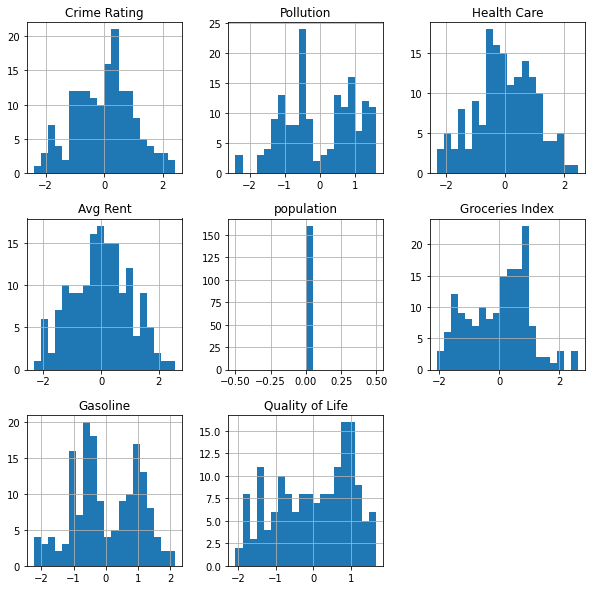

In [78]:
data_trans_clust.hist(figsize=(10,10), bins=20)
plt.show()

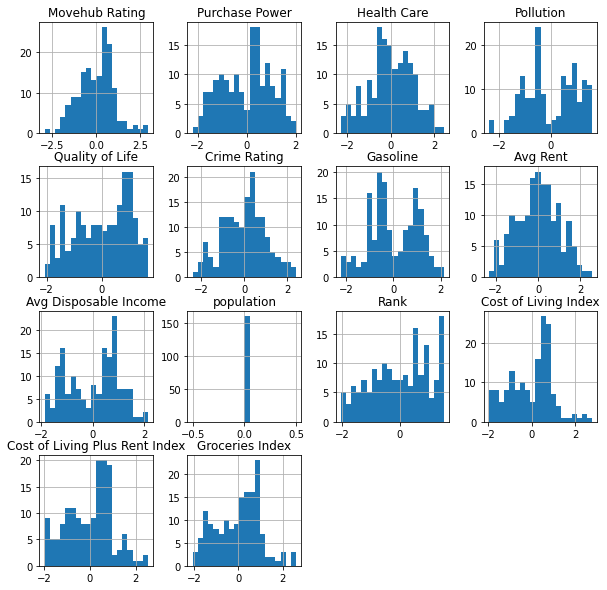

In [79]:
data_trans_all.hist(figsize=(10,10), bins=20)
plt.show()

### Feature Transform: Robust Scaler

In [80]:
#Corr
rscaler_clust = RobustScaler()
rscaler_clust.fit(data_trans_clust)
data_scaled_clust = rscaler_clust.transform(data_trans_clust)

#All
rscaler_all = RobustScaler()
rscaler_all.fit(data_trans_all)
data_scaled_all = rscaler_all.transform(data_trans_all)

In [81]:
# Original training dataset
print("Original median : %s " % rscaler_clust.center_)
print("Original IQR : %s " % rscaler_clust.scale_)

#Scaled training dataset
print("Scaled median : %s " % np.median(data_scaled_clust,axis=0))
print("Scaled IQR : %s " % (np.percentile(data_scaled_clust, 75,axis=0)-np.percentile(data_scaled_clust, 25,axis=0)))

Original median : [ 0.077295   -0.21515398 -0.02874168  0.02954071  0.          0.18847968
 -0.17134008  0.14139209] 
Original IQR : [1.36553605 1.67881431 1.29689704 1.411159   1.         1.51383737
 1.60384539 1.65379094] 
Scaled median : [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.33680869e-18] 
Scaled IQR : [1. 1. 1. 1. 0. 1. 1. 1.] 


In [82]:
data_scaled_clust=pd.DataFrame(data_scaled_clust,index=data_clust.index, columns=data_clust.columns)

data_scaled_all=pd.DataFrame(data_scaled_all,index=data_all_feat.index, columns=data_all_feat.columns)

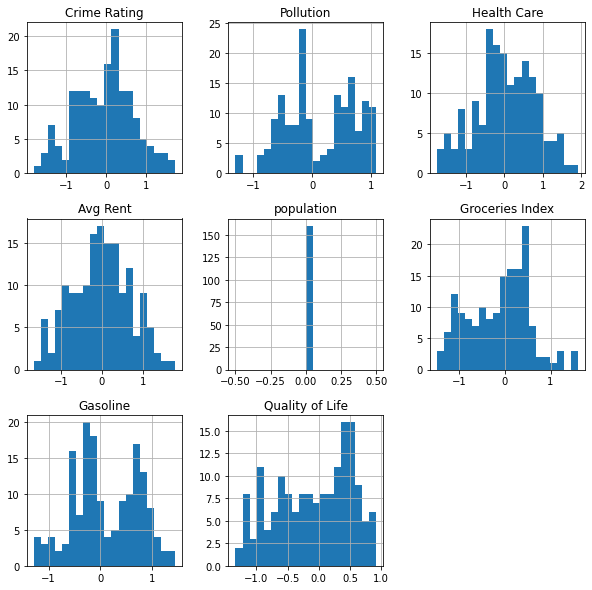

In [83]:
data_scaled_clust.hist(figsize=(10,10), bins=20)
plt.show()

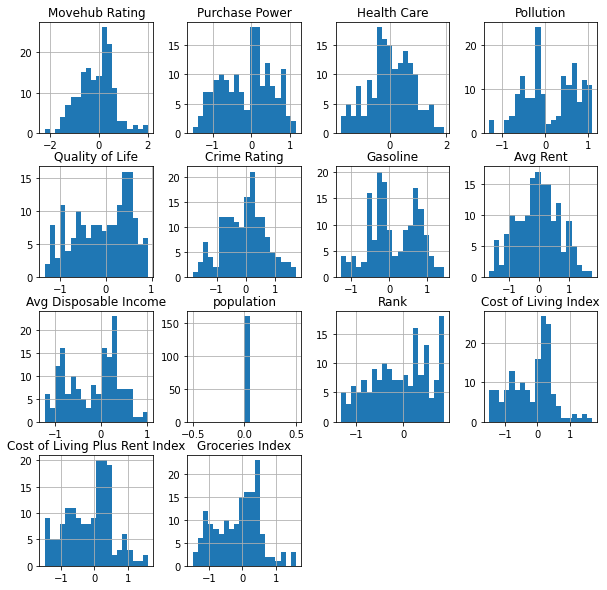

In [84]:
data_scaled_all.hist(figsize=(10,10), bins=20)
plt.show()

In [85]:
data_scaled_clust.describe()

Crime Rating   Pollution  Health Care    Avg Rent  population  \
count    160.000000  160.000000   160.000000  160.000000       160.0   
mean      -0.056604    0.128158     0.022162   -0.020934         0.0   
std        0.734612    0.597529     0.773492    0.710862         0.0   
min       -1.813139   -1.305181    -1.749582   -1.670421         0.0   
25%       -0.593681   -0.343976    -0.413263   -0.525808         0.0   
50%        0.000000    0.000000     0.000000    0.000000         0.0   
75%        0.406319    0.656024     0.586737    0.474192         0.0   
max        1.713451    1.092792     1.920502    1.791569         0.0   

       Groceries Index    Gasoline  Quality of Life  
count       160.000000  160.000000     1.600000e+02  
mean         -0.124505    0.106831    -8.549575e-02  
std           0.662647    0.625459     6.065699e-01  
min          -1.484413   -1.281599    -1.336276e+00  
25%          -0.630493   -0.321958    -5.758724e-01  
50%           0.000000    0.000000    -4.336809e-18  
75%           0.369507    0.678042     4.241276e-01  
max           1.599537    1.442479     9.256717e-01

## 3.1. K-Means

### Uncorrelated features

#### Elbow Plot

In [86]:
def elbow_plot(X, n):
    """Inputs:
        X (2-D Array): Feature Matrix for clustering
        
        n (int): Number of clusters to consider
        
        Outputs: Elbow Plot
    """
    sns.set()
    inertia = []
    for i in range(n):
        kmeans = KMeans(n_clusters = i+1)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
        
    x = np.arange(n) + 1
    
    plt.figure(figsize = (12,8))
    plt.plot(x, inertia, '-o')
    plt.xlabel('Number of Clusters', fontsize = 15)
    plt.ylabel('Inertia', fontsize = 15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title('Elbow Plot')

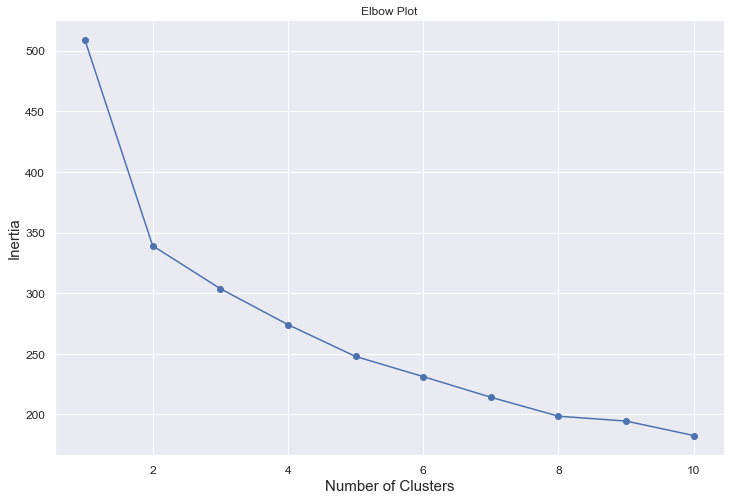

In [87]:
#0ptimum number of cluster (Elbow plot)
elbow_plot(data_scaled_clust, 10)

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.29263384443110096
For n_clusters = 3 The average silhouette_score is : 0.19695577110776719
For n_clusters = 4 The average silhouette_score is : 0.17533582513419554
For n_clusters = 5 The average silhouette_score is : 0.17072741865838245
For n_clusters = 6 The average silhouette_score is : 0.17701001542884917


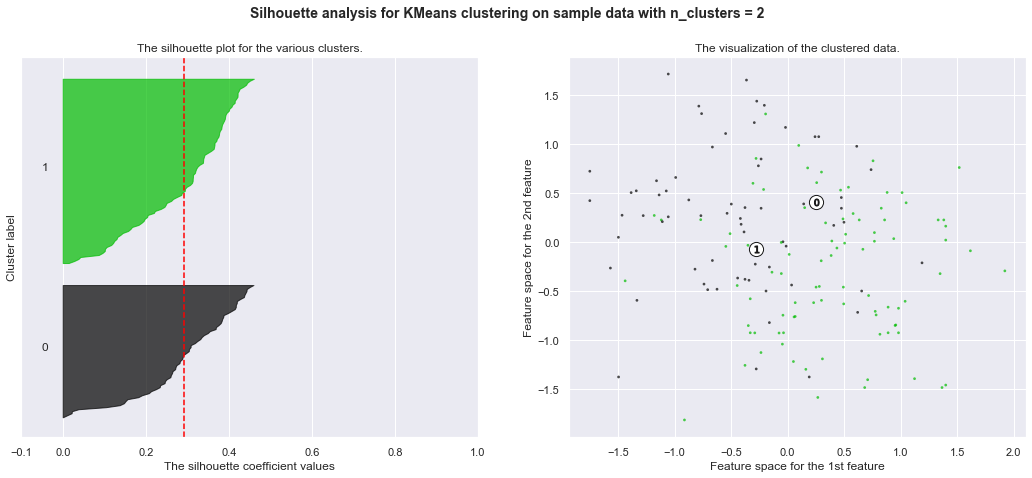

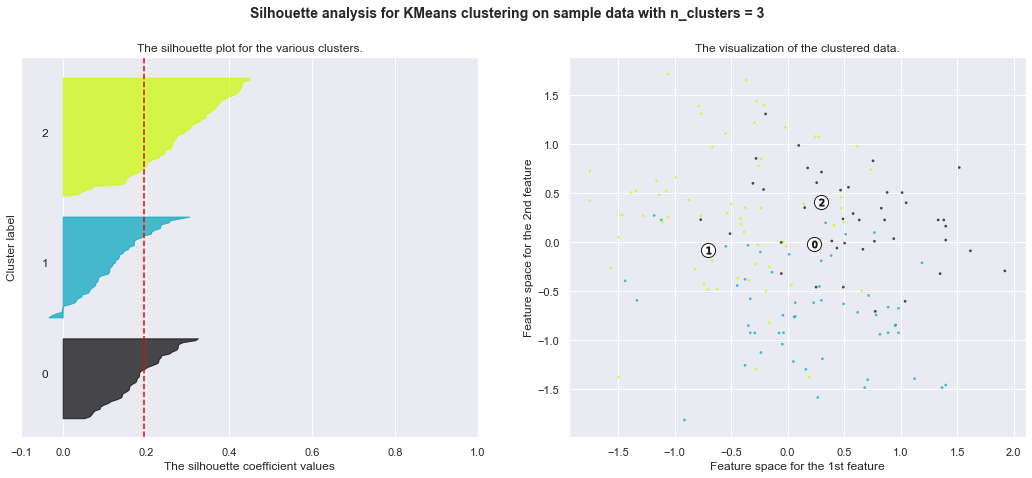

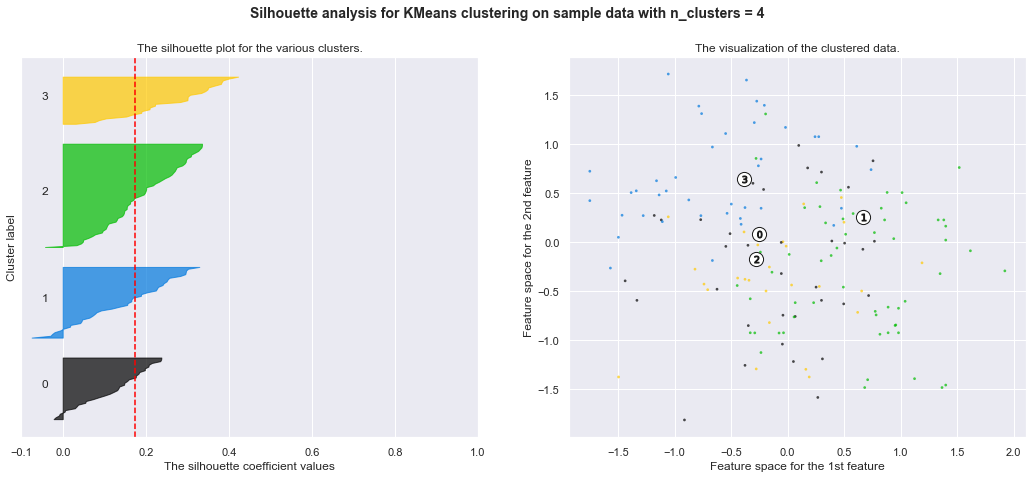

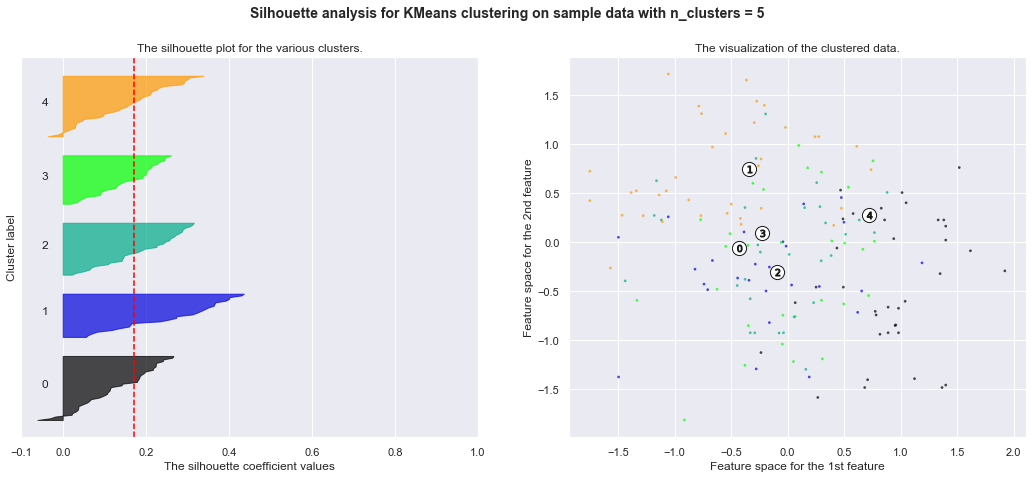

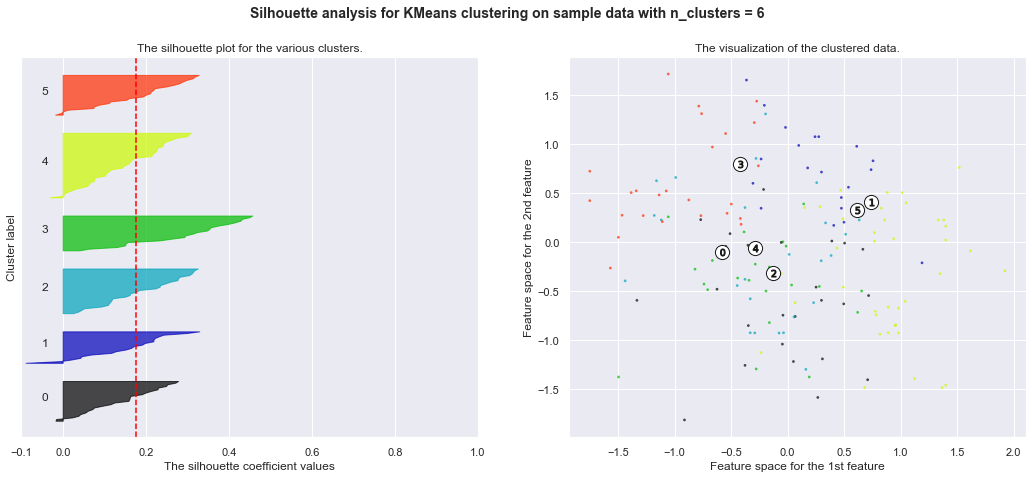

In [88]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Silhouette Method

print(__doc__)

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_scaled_clust) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_scaled_clust)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_scaled_clust, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_scaled_clust, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_scaled_clust['Health Care'], data_scaled_clust['Crime Rating'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')


    
plt.show()

In [89]:
#Applying KMeans
kmeans_cluster = KMeans(n_clusters=5)
kmeans_cluster.fit(data_scaled_clust)
cluster_labels = kmeans_cluster.labels_
cluster_centers = kmeans_cluster.cluster_centers_

In [90]:
print(cluster_labels.shape)
print(cluster_centers.shape)
print(data_scaled_clust.shape)

(160,)
(5, 8)
(160, 8)


In [91]:
data_clust['Clust']=cluster_labels
data_clust[['City','Country_x','Movehub Rating','Purchase Power']]=data_feat[['City','Country_x', 'Movehub Rating','Purchase Power']]
data_clust[['Avg Disposable Income','Cost of Living Index','Cost of Living Plus Rent Index', 'Rank']]=data_feat[['Avg Disposable Income','Cost of Living Index','Cost of Living Plus Rent Index','Rank']]
data_clust.head()

Crime Rating  Pollution  Health Care  Avg Rent  population  \
0         85.70      83.45        44.44   1634.42   2985000.0   
1         83.93      47.39        59.98    705.63   3435000.0   
3         77.86      18.95        61.76    747.10  19028000.0   
4         76.69      83.45        63.05    632.19   3522206.0   
5         76.46      86.16        51.01    487.69   3917000.0   

   Groceries Index  Gasoline  Quality of Life  Clust          City  \
0            28.40      0.07             8.61      2       Caracas   
1            35.68      0.84            51.26      2  Johannesburg   
3            29.88      0.56            27.91      2   Mexico City   
4            56.21      0.67            50.99      2       Detroit   
5            28.08      0.89            31.87      2  Porto Alegre   

       Country_x  Movehub Rating  Purchase Power  Avg Disposable Income  \
0      Venezuela           65.18           11.25                 527.89   
1   South Africa           84.08           53.99                1167.89   
3         Mexico           75.07           24.28                 587.01   
4  United States           70.63           73.81                1895.93   
5         Brazil           70.46           19.07                 306.89   

   Cost of Living Index  Cost of Living Plus Rent Index   Rank  
0                 27.82                           18.64  500.0  
1                 45.51                           32.18  356.0  
3                 34.18                           26.49  454.0  
4                 62.77                           49.25  256.0  
5                 40.56                           26.32  389.0

In [92]:
data_clust['Clust'] = data_clust['Clust'].astype('category')

#### Visualization

In [93]:
fig = px.scatter(
  data_clust, y='Pollution', x='Purchase Power', 
  color='Clust', size='population',
  hover_data=["City","Avg Disposable Income","Health Care","Quality of Life","Avg Rent","Cost of Living Index","Crime Rating"],
  title=("K-Means Clustering (Pollution vs Purchase Power)")
)

fig.show()

In [94]:
fig = px.scatter(
  data_clust, y='Crime Rating', x='Quality of Life', 
  color='Clust', size='population',
  hover_data=["City","Avg Disposable Income","Health Care","Purchase Power","Avg Rent","Cost of Living Index","Pollution"],
  title=("K-Means Clustering (Crime Rating vs Quality of Life)")
)

fig.show()

In [95]:
fig = px.scatter(
  data_clust, y='Health Care', x='Avg Disposable Income', 
  color='Clust', size='population',
  hover_data=["City","Crime Rating","Quality of Life","Purchase Power","Avg Rent","Cost of Living Index","Pollution"],
  title=("K-Means Clustering (Health Care vs Avg Disposable Income)")
)

fig.show()

In [96]:
fig = px.scatter(
  data_clust, y='Avg Rent', x='Crime Rating', 
  color='Clust', size='population',
  hover_data=["City","Avg Disposable Income","Quality of Life","Purchase Power","Health Care","Cost of Living Index","Pollution"],
  title=("K-Means Clustering (Avg Rent vs Avg Crime Rating)")
)

fig.show()

In [97]:
data_clust[['Lat','Lon']] = data[['lat_x','lng_x']]
data_clust.head()

Crime Rating  Pollution  Health Care  Avg Rent  population  \
0         85.70      83.45        44.44   1634.42   2985000.0   
1         83.93      47.39        59.98    705.63   3435000.0   
3         77.86      18.95        61.76    747.10  19028000.0   
4         76.69      83.45        63.05    632.19   3522206.0   
5         76.46      86.16        51.01    487.69   3917000.0   

   Groceries Index  Gasoline  Quality of Life Clust          City  \
0            28.40      0.07             8.61     2       Caracas   
1            35.68      0.84            51.26     2  Johannesburg   
3            29.88      0.56            27.91     2   Mexico City   
4            56.21      0.67            50.99     2       Detroit   
5            28.08      0.89            31.87     2  Porto Alegre   

       Country_x  Movehub Rating  Purchase Power  Avg Disposable Income  \
0      Venezuela           65.18           11.25                 527.89   
1   South Africa           84.08           53.99                1167.89   
3         Mexico           75.07           24.28                 587.01   
4  United States           70.63           73.81                1895.93   
5         Brazil           70.46           19.07                 306.89   

   Cost of Living Index  Cost of Living Plus Rent Index   Rank        Lat  \
0                 27.82                           18.64  500.0  10.480594   
1                 45.51                           32.18  356.0 -26.204103   
3                 34.18                           26.49  454.0  19.432608   
4                 62.77                           49.25  256.0  42.331427   
5                 40.56                           26.32  389.0 -30.034647   

         Lon  
0 -66.903606  
1  28.047305  
3 -99.133208  
4 -83.045754  
5 -51.217658

In [98]:
fig = px.scatter_geo(data_clust, lat="Lat", lon="Lon", hover_name="City", 
                    hover_data=["population","Purchase Power","Health Care","Quality of Life","Pollution","Crime Rating",
                                   "Avg Rent","Cost of Living Index","Avg Disposable Income"],
                    color='Clust', size="population",
                    height=600, projection="natural earth",
                    title=("K-Means Clustering"))

fig.show()

In [99]:
fig = px.scatter_mapbox(data_clust, lat="Lat", lon="Lon", hover_name="City", 
                        hover_data=["population","Purchase Power","Health Care","Quality of Life","Pollution","Crime Rating",
                                   "Avg Rent","Cost of Living Index","Avg Disposable Income"],
                        color='Clust',
                        zoom=3, 
                        height=300)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## 3.2. Agglomerative Clustering

### Uncorrelated features

#### Complete

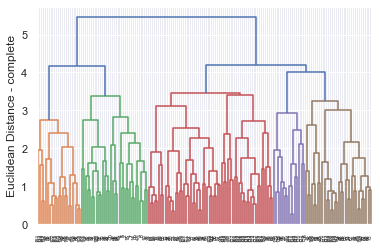

In [100]:
clusters = linkage(data_scaled_clust,  metric='euclidean', method='complete')

dendr = dendrogram(clusters)

plt.ylabel('Euclidean Distance - complete');

In [101]:
ac = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

prediction = ac.fit_predict(data_scaled_clust) #generates cluster labels
print('Cluster labels: %s\n' % prediction)

Cluster labels: [1 1 1 1 1 1 2 1 1 1 1 1 0 2 1 2 2 0 1 0 0 2 1 0 2 2 2 0 0 4 0 1 1 0 0 1 1
 3 1 1 0 3 1 0 2 0 0 1 2 1 0 1 2 1 2 3 1 0 4 0 0 0 2 0 1 2 2 2 2 0 3 0 4 2
 1 0 0 0 0 3 4 0 2 0 3 4 0 0 0 2 0 0 1 2 2 3 3 1 3 0 2 0 0 1 2 3 2 3 3 0 3
 0 0 1 3 3 3 4 2 0 4 0 0 2 4 0 0 0 3 0 4 4 0 3 0 0 4 0 2 2 0 2 2 0 4 0 4 4
 0 3 2 3 3 0 0 0 0 0 0 4]



In [102]:
clus_ac_comp=prediction
print(clus_ac_comp.shape)

(160,)


In [103]:
data_clust_orig['Clust']=clus_ac_comp

In [104]:
data_clust_orig[['City','Country_x','Movehub Rating','Purchase Power']]=data_feat[['City','Country_x', 'Movehub Rating','Purchase Power']]
data_clust_orig[['Avg Disposable Income','Cost of Living Index','Cost of Living Plus Rent Index', 'Rank']]=data_feat[['Avg Disposable Income','Cost of Living Index','Cost of Living Plus Rent Index','Rank']]
data_clust_orig.head()

Crime Rating  Pollution  Health Care  Avg Rent  population  \
0         85.70      83.45        44.44   1634.42   2985000.0   
1         83.93      47.39        59.98    705.63   3435000.0   
3         77.86      18.95        61.76    747.10  19028000.0   
4         76.69      83.45        63.05    632.19   3522206.0   
5         76.46      86.16        51.01    487.69   3917000.0   

   Groceries Index  Gasoline  Quality of Life  Clust          City  \
0            28.40      0.07             8.61      1       Caracas   
1            35.68      0.84            51.26      1  Johannesburg   
3            29.88      0.56            27.91      1   Mexico City   
4            56.21      0.67            50.99      1       Detroit   
5            28.08      0.89            31.87      1  Porto Alegre   

       Country_x  Movehub Rating  Purchase Power  Avg Disposable Income  \
0      Venezuela           65.18           11.25                 527.89   
1   South Africa           84.08           53.99                1167.89   
3         Mexico           75.07           24.28                 587.01   
4  United States           70.63           73.81                1895.93   
5         Brazil           70.46           19.07                 306.89   

   Cost of Living Index  Cost of Living Plus Rent Index   Rank        Lat  \
0                 27.82                           18.64  500.0  10.480594   
1                 45.51                           32.18  356.0 -26.204103   
3                 34.18                           26.49  454.0  19.432608   
4                 62.77                           49.25  256.0  42.331427   
5                 40.56                           26.32  389.0 -30.034647   

         Lon  
0 -66.903606  
1  28.047305  
3 -99.133208  
4 -83.045754  
5 -51.217658

In [105]:
data_clust_orig['Clust'] = data_clust_orig['Clust'].astype('category')

#### Visualization

In [106]:
fig = px.scatter(
  data_clust_orig, y='Pollution', x='Purchase Power', 
  color='Clust', size='population',
  hover_data=["City","Avg Disposable Income","Health Care","Quality of Life","Avg Rent","Cost of Living Index","Crime Rating"],
  title=("Agglomerative Clustering (Pollution vs Purchase Power)")
)

fig.show()

In [107]:
fig = px.scatter(
  data_clust_orig, y='Crime Rating', x='Quality of Life', 
  color='Clust', size='population',
  hover_data=["City","Avg Disposable Income","Health Care","Purchase Power","Avg Rent","Cost of Living Index","Pollution"],
  title=("Agglomerative Clustering (Crime Rating vs Quality of Life)")
)

fig.show()

In [108]:
fig = px.scatter(
  data_clust_orig, y='Health Care', x='Avg Disposable Income', 
  color='Clust', size='population',
  hover_data=["City","Crime Rating","Quality of Life","Purchase Power","Avg Rent","Cost of Living Index","Pollution"],
  title=("Agglomerative Clustering (Health Care vs Avg Disposable Income)")
)

fig.show()

In [109]:
fig = px.scatter(
  data_clust_orig, y='Avg Rent', x='Crime Rating', 
  color='Clust', size='population',
  hover_data=["City","Avg Disposable Income","Quality of Life","Purchase Power","Health Care","Cost of Living Index","Pollution"],
  title=("Agglomerative Clustering (Avg Rent vs Avg Crime Rating)")
)

fig.show()

In [110]:
data_clust_orig[['Lat','Lon']] = data[['lat_x','lng_x']]
data_clust_orig.head()

Crime Rating  Pollution  Health Care  Avg Rent  population  \
0         85.70      83.45        44.44   1634.42   2985000.0   
1         83.93      47.39        59.98    705.63   3435000.0   
3         77.86      18.95        61.76    747.10  19028000.0   
4         76.69      83.45        63.05    632.19   3522206.0   
5         76.46      86.16        51.01    487.69   3917000.0   

   Groceries Index  Gasoline  Quality of Life Clust          City  \
0            28.40      0.07             8.61     1       Caracas   
1            35.68      0.84            51.26     1  Johannesburg   
3            29.88      0.56            27.91     1   Mexico City   
4            56.21      0.67            50.99     1       Detroit   
5            28.08      0.89            31.87     1  Porto Alegre   

       Country_x  Movehub Rating  Purchase Power  Avg Disposable Income  \
0      Venezuela           65.18           11.25                 527.89   
1   South Africa           84.08           53.99                1167.89   
3         Mexico           75.07           24.28                 587.01   
4  United States           70.63           73.81                1895.93   
5         Brazil           70.46           19.07                 306.89   

   Cost of Living Index  Cost of Living Plus Rent Index   Rank        Lat  \
0                 27.82                           18.64  500.0  10.480594   
1                 45.51                           32.18  356.0 -26.204103   
3                 34.18                           26.49  454.0  19.432608   
4                 62.77                           49.25  256.0  42.331427   
5                 40.56                           26.32  389.0 -30.034647   

         Lon  
0 -66.903606  
1  28.047305  
3 -99.133208  
4 -83.045754  
5 -51.217658

In [111]:
fig = px.scatter_geo(data_clust_orig, lat="Lat", lon="Lon", hover_name="City", 
                    hover_data=["population","Purchase Power","Health Care","Quality of Life","Pollution","Crime Rating",
                                   "Avg Rent","Cost of Living Index","Avg Disposable Income"],
                    color='Clust', size="population",
                    height=600, projection="natural earth",
                    title=("Agglomerative Clustering"))

fig.show()

In [112]:
fig = px.scatter_mapbox(data_clust_orig, lat="Lat", lon="Lon", hover_name="City", 
                        hover_data=["population","Purchase Power","Health Care","Quality of Life","Pollution","Crime Rating",
                                   "Avg Rent","Cost of Living Index","Avg Disposable Income"],
                        color='Clust',
                        zoom=3, 
                        height=300)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()